# IST 652 Project - Indian Premier League : Sports analysis 

## Group 3

Team Members : Adarsh S, Prasun S, Tarun T, Nandita P

## Importing packages

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import LabelEncoder

## Phase 1 : data cleaning

In [26]:
# Read the CSV file from the URL into a pandas dataframe with 'ISO-8859-1' encoding
url = 'https://query.data.world/s/2a6soodhpibej6iu67a2upte7euehy?dws=00000'
player_match_df = pd.read_csv(url, encoding='ISO-8859-1')

# Display the dataframe
player_match_df.head()

,Player_match_SK,PlayerMatch_key,Match_Id,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name,Role_Desc,...,Season_year,is_manofThematch,Age_As_on_match,IsPlayers_Team_won,Batting_Status,Bowling_Status,Player_Captain,Opposit_captain,Player_keeper,Opposit_keeper
0,12694,33598700006,335987,6,R Dravid,1/11/1973,Right-hand bat,Right-arm offbreak,India,Captain,...,2008,False,35,False,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
1,12695,33598700007,335987,7,W Jaffer,2/16/1978,Right-hand bat,Right-arm offbreak,India,Player,...,2008,False,30,False,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
2,12696,33598700008,335987,8,V Kohli,11/5/1988,Right-hand bat,Right-arm medium,India,Player,...,2008,False,20,False,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
3,12697,33598700009,335987,9,JH Kallis,10/16/1975,Right-hand bat,Right-arm fast-medium,South Africa,Player,...,2008,False,33,False,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
4,12698,33598700010,335987,10,CL White,8/18/1983,Right-hand bat,Legbreak googly,Australia,Player,...,2008,False,25,False,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha


In [27]:
# Read the CSV file from the URL into a pandas dataframe with 'ISO-8859-1' encoding
url2 = 'https://query.data.world/s/zsvjf3datludh4ih4efoxtieqjmq4f?dws=00000'
match_df = pd.read_csv(url2, encoding='ISO-8859-1')

# Display the dataframe
match_df

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,4/18/2008,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
1,1,335988,Kings XI Punjab,Chennai Super Kings,4/19/2008,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33.0,1
2,2,335989,Delhi Daredevils,Rajasthan Royals,4/19/2008,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9.0,1
3,3,335990,Mumbai Indians,Royal Challengers Bangalore,4/20/2008,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5.0,1
4,4,335991,Kolkata Knight Riders,Deccan Chargers,4/20/2008,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,632,1082646,Delhi Daredevils,Royal Challengers Bangalore,5/14/2017,2017,Feroz Shah Kotla,Delhi,India,Royal Challengers Bangalore,Royal Challengers Bangalore,Bat,runs,Result,HV Patel,10.0,1
633,633,1082647,Mumbai Indians,Rising Pune Supergiants,5/16/2017,2017,Wankhede Stadium,Mumbai,India,Mumbai Indians,Rising Pune Supergiants,Field,runs,Result,Wasington Sundar,20.0,1
634,634,1082648,Sunrisers Hyderabad,Kolkata Knight Riders,5/17/2017,2017,M Chinnaswamy Stadium,Bengaluru,India,Kolkata Knight Riders,Kolkata Knight Riders,Field,wickets,Result,NM Coulter-Nile,7.0,1
635,635,1082649,Mumbai Indians,Kolkata Knight Riders,5/19/2017,2017,M Chinnaswamy Stadium,Bengaluru,India,Mumbai Indians,Mumbai Indians,Field,wickets,Result,KV Sharma,6.0,1


In [155]:
# Importing data set
match_datadf = pd.read_csv('Match.csv')
match_datadf

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,4/18/2008,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
1,1,335988,Kings XI Punjab,Chennai Super Kings,4/19/2008,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33.0,1
2,2,335989,Delhi Daredevils,Rajasthan Royals,4/19/2008,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9.0,1
3,3,335990,Mumbai Indians,Royal Challengers Bangalore,4/20/2008,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5.0,1
4,4,335991,Kolkata Knight Riders,Deccan Chargers,4/20/2008,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,632,1082646,Delhi Daredevils,Royal Challengers Bangalore,5/14/2017,2017,Feroz Shah Kotla,Delhi,India,Royal Challengers Bangalore,Royal Challengers Bangalore,Bat,runs,Result,HV Patel,10.0,1
633,633,1082647,Mumbai Indians,Rising Pune Supergiants,5/16/2017,2017,Wankhede Stadium,Mumbai,India,Mumbai Indians,Rising Pune Supergiants,Field,runs,Result,Wasington Sundar,20.0,1
634,634,1082648,Sunrisers Hyderabad,Kolkata Knight Riders,5/17/2017,2017,M Chinnaswamy Stadium,Bengaluru,India,Kolkata Knight Riders,Kolkata Knight Riders,Field,wickets,Result,NM Coulter-Nile,7.0,1
635,635,1082649,Mumbai Indians,Kolkata Knight Riders,5/19/2017,2017,M Chinnaswamy Stadium,Bengaluru,India,Mumbai Indians,Mumbai Indians,Field,wickets,Result,KV Sharma,6.0,1


In [29]:
player_match_df = player_match_df.rename(columns={'Match_Id': 'match_id', })
#renaming the column on which we are merging the datasets and which will be used for further data analysis

In [31]:
# Merge the datasets using match_id column
merged_df = pd.merge(player_match_df, match_df, on='match_id')

# Print the merged dataframe
merged_df.head()

,Player_match_SK,PlayerMatch_key,match_id,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name_x,Role_Desc,...,City_Name,Country_Name_y,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,12694,33598700006,335987,6,R Dravid,1/11/1973,Right-hand bat,Right-arm offbreak,India,Captain,...,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
1,12695,33598700007,335987,7,W Jaffer,2/16/1978,Right-hand bat,Right-arm offbreak,India,Player,...,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
2,12696,33598700008,335987,8,V Kohli,11/5/1988,Right-hand bat,Right-arm medium,India,Player,...,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
3,12697,33598700009,335987,9,JH Kallis,10/16/1975,Right-hand bat,Right-arm fast-medium,South Africa,Player,...,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
4,12698,33598700010,335987,10,CL White,8/18/1983,Right-hand bat,Legbreak googly,Australia,Player,...,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1


In [32]:
# Count the number of null values in each column
null_count = merged_df.isnull().sum()

# Print the results
print(null_count)

Player_match_SK           0
PlayerMatch_key           0
match_id                  0
Player_Id                 0
Player_Name               0
DOB                       0
Batting_hand              0
Bowling_skill          1130
Country_Name_x            0
Role_Desc                 0
Player_team               0
Opposit_Team              0
Season_year               0
is_manofThematch          0
Age_As_on_match           0
IsPlayers_Team_won        0
Batting_Status        13992
Bowling_Status        13992
Player_Captain            0
Opposit_captain           0
Player_keeper             0
Opposit_keeper            0
Match_SK                  0
Team1                     0
Team2                     0
match_date                0
Season_Year               0
Venue_Name                0
City_Name                 0
Country_Name_y            0
Toss_Winner               0
match_winner             66
Toss_Name                 0
Win_Type                 22
Outcome_Type              0
ManOfMach           

In [33]:
# Drop the 'Batting_Status' and 'Bowling_Status' columns from the DataFrame
clean_df = merged_df.drop(['Batting_Status', 'Bowling_Status'], axis=1)

# Print the modified DataFrame
clean_df.head()

,Player_match_SK,PlayerMatch_key,match_id,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name_x,Role_Desc,...,City_Name,Country_Name_y,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,12694,33598700006,335987,6,R Dravid,1/11/1973,Right-hand bat,Right-arm offbreak,India,Captain,...,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
1,12695,33598700007,335987,7,W Jaffer,2/16/1978,Right-hand bat,Right-arm offbreak,India,Player,...,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
2,12696,33598700008,335987,8,V Kohli,11/5/1988,Right-hand bat,Right-arm medium,India,Player,...,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
3,12697,33598700009,335987,9,JH Kallis,10/16/1975,Right-hand bat,Right-arm fast-medium,South Africa,Player,...,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
4,12698,33598700010,335987,10,CL White,8/18/1983,Right-hand bat,Legbreak googly,Australia,Player,...,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1


In [34]:
clean_df['Bowling_skill'].fillna('not a baller', inplace=True)
null_bowling_df = clean_df[clean_df['Bowling_skill'].isnull()]
null_bowling_df
#the data points where bowling skill is null, that player is not a baller, 
#and so we fill the data points with 'not a baller'

,Player_match_SK,PlayerMatch_key,match_id,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name_x,Role_Desc,...,City_Name,Country_Name_y,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id


In [35]:
clean_df['match_winner'].fillna('Match Abandoned', inplace=True)
clean_df['Win_Type'].fillna('Match Tied', inplace=True)
clean_df['ManOfMach'].fillna('No Man of the match', inplace=True)
clean_df['Win_Margin'].fillna('Match abandoned or Tied', inplace=True)
clean_df.head()

,Player_match_SK,PlayerMatch_key,match_id,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name_x,Role_Desc,...,City_Name,Country_Name_y,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,12694,33598700006,335987,6,R Dravid,1/11/1973,Right-hand bat,Right-arm offbreak,India,Captain,...,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
1,12695,33598700007,335987,7,W Jaffer,2/16/1978,Right-hand bat,Right-arm offbreak,India,Player,...,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
2,12696,33598700008,335987,8,V Kohli,11/5/1988,Right-hand bat,Right-arm medium,India,Player,...,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
3,12697,33598700009,335987,9,JH Kallis,10/16/1975,Right-hand bat,Right-arm fast-medium,South Africa,Player,...,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
4,12698,33598700010,335987,10,CL White,8/18/1983,Right-hand bat,Legbreak googly,Australia,Player,...,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1


In [36]:
match_datadf.loc[match_datadf['Toss_Name'] == 'Field', 'Toss_Name'] = 'field'
match_datadf.loc[match_datadf['Toss_Name'] == 'Bat', 'Toss_Name'] = 'bat'

In [37]:
match_datadf[match_datadf.isna().any(axis=1)]

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
66,66,392195,Kolkata Knight Riders,Rajasthan Royals,4/23/2009,2009,Newlands,Cape Town,South Africa,Kolkata Knight Riders,Rajasthan Royals,field,Tie,Superover,YK Pathan,NaN,2
130,130,419126,Chennai Super Kings,Kings XI Punjab,3/21/2010,2010,"MA Chidambaram Stadium, Chepauk",Chennai,India,Chennai Super Kings,Kings XI Punjab,field,Tie,Superover,J Theron,NaN,1
241,241,501270,Delhi Daredevils,Pune Warriors,5/21/2011,2011,Feroz Shah Kotla,Delhi,India,Delhi Daredevils,NaN,bat,NO Result,No Result,NaN,NaN,1
328,328,598009,Sunrisers Hyderabad,Royal Challengers Bangalore,4/7/2013,2013,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,Tie,Superover,GH Vihari,NaN,1
341,341,598022,Royal Challengers Bangalore,Delhi Daredevils,4/16/2013,2013,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Tie,Superover,V Kohli,NaN,1
416,416,729320,Kolkata Knight Riders,Rajasthan Royals,4/29/2014,2014,Sheikh Zayed Stadium,Abu Dhabi,U.A.E,Rajasthan Royals,Rajasthan Royals,bat,Tie,Superover,JP Faulkner,NaN,3
476,476,829746,Rajasthan Royals,Kings XI Punjab,4/21/2015,2015,"Sardar Patel Stadium, Motera",Ahmedabad,India,Kings XI Punjab,Kings XI Punjab,field,Tie,Superover,SE Marsh,NaN,1
486,486,829768,Royal Challengers Bangalore,Rajasthan Royals,4/29/2015,2015,M Chinnaswamy Stadium,Bangalore,India,Rajasthan Royals,NaN,field,NO Result,No Result,NaN,NaN,1
511,511,829818,Royal Challengers Bangalore,Delhi Daredevils,5/17/2015,2015,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,NaN,field,NO Result,No Result,NaN,NaN,1
605,605,1082619,Royal Challengers Bangalore,Sunrisers Hyderabad,4/25/2017,2017,NaN,Bengaluru,India,NaN,abandoned,NaN,NaN,abandoned,NaN,0.0,1


In [39]:
match_datadf.dropna(subset=['match_winner'])
match_datadf.dropna(subset=['Toss_Name'])

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,4/18/2008,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
1,1,335988,Kings XI Punjab,Chennai Super Kings,4/19/2008,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33.0,1
2,2,335989,Delhi Daredevils,Rajasthan Royals,4/19/2008,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9.0,1
3,3,335990,Mumbai Indians,Royal Challengers Bangalore,4/20/2008,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5.0,1
4,4,335991,Kolkata Knight Riders,Deccan Chargers,4/20/2008,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,632,1082646,Delhi Daredevils,Royal Challengers Bangalore,5/14/2017,2017,Feroz Shah Kotla,Delhi,India,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,runs,Result,HV Patel,10.0,1
633,633,1082647,Mumbai Indians,Rising Pune Supergiants,5/16/2017,2017,Wankhede Stadium,Mumbai,India,Mumbai Indians,Rising Pune Supergiants,field,runs,Result,Wasington Sundar,20.0,1
634,634,1082648,Sunrisers Hyderabad,Kolkata Knight Riders,5/17/2017,2017,M Chinnaswamy Stadium,Bengaluru,India,Kolkata Knight Riders,Kolkata Knight Riders,field,wickets,Result,NM Coulter-Nile,7.0,1
635,635,1082649,Mumbai Indians,Kolkata Knight Riders,5/19/2017,2017,M Chinnaswamy Stadium,Bengaluru,India,Mumbai Indians,Mumbai Indians,field,wickets,Result,KV Sharma,6.0,1


In [40]:
match_datadf[match_datadf['match_winner'] == 'field']

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id


Data by this point is completely clean. 
There were 4 columns that would've been major factors in analyzing the data, and they had null values.
1. Bowling skill : Since every data point is essential in our dataset, this column had 1130 values that were null. We researched on google diving into the details of the actual matches and figured out that these players who did not have a bowling skill were non-ballers. This means, they were either batters or fielders or wicket-keepers. To overcome this, we changed the null values to 'not a baller'.
2. Match winner : Since every match is important for our sport analysis, this column had 66 null values. Upon researching on google, we figured out that these matches did not have a winner due to match getting abandoned for reasons concerned with weather conditions. To fill in these gaps, we changed the null values to 'match abandoned'.
   Reference link for the reserach : https://www.espncricinfo.com/series/indian-premier-league-2011-466304/delhi-daredevils-vs-pune-warriors-68th-match-501265/match-report
3. Win type : The null values in these columns were for matches that were neither won nor lost. These matches were tied. So, we filled in the null values with 'match tied'.
   Reference link for the research : https://www.cricketwa.com/article/172/super-over-in-ipl.aspx
4. Win margin : Win margins are based on whether the winning team won the match by extra runs, or extra wickets. The null values in this column substituted to the matches that were either tied or abandoned. So to fill in the gaps, we changed the null values to 'match abandoned or tied'.
   Reference link for research : https://www.cricketwa.com/article/172/super-over-in-ipl.aspx (tied matches)
          https://www.espncricinfo.com/series/indian-premier-league-2011-466304/delhi-daredevils-vs-pune-warriors-68th-match-501265/match-report (match abandoned)

Our data is entirely clean now for further analysis and we are ready to answer the questions that we initially set up for the analysis.

In [41]:
# Count the number of null values in each column
null_count1 = clean_df.isnull().sum()

# Print the results
print(null_count1)

Player_match_SK       0
PlayerMatch_key       0
match_id              0
Player_Id             0
Player_Name           0
DOB                   0
Batting_hand          0
Bowling_skill         0
Country_Name_x        0
Role_Desc             0
Player_team           0
Opposit_Team          0
Season_year           0
is_manofThematch      0
Age_As_on_match       0
IsPlayers_Team_won    0
Player_Captain        0
Opposit_captain       0
Player_keeper         0
Opposit_keeper        0
Match_SK              0
Team1                 0
Team2                 0
match_date            0
Season_Year           0
Venue_Name            0
City_Name             0
Country_Name_y        0
Toss_Winner           0
match_winner          0
Toss_Name             0
Win_Type              0
Outcome_Type          0
ManOfMach             0
Win_Margin            0
Country_id            0
dtype: int64


In [42]:
clean_df.columns
# Listing all the columns present in the clean_df dataframe

Index(['Player_match_SK', 'PlayerMatch_key', 'match_id', 'Player_Id',
       'Player_Name', 'DOB', 'Batting_hand', 'Bowling_skill', 'Country_Name_x',
       'Role_Desc', 'Player_team', 'Opposit_Team', 'Season_year',
       'is_manofThematch', 'Age_As_on_match', 'IsPlayers_Team_won',
       'Player_Captain', 'Opposit_captain', 'Player_keeper', 'Opposit_keeper',
       'Match_SK', 'Team1', 'Team2', 'match_date', 'Season_Year', 'Venue_Name',
       'City_Name', 'Country_Name_y', 'Toss_Winner', 'match_winner',
       'Toss_Name', 'Win_Type', 'Outcome_Type', 'ManOfMach', 'Win_Margin',
       'Country_id'],
      dtype='object')

## Team Performance Analysis

In [43]:
TeamP_df = clean_df[['match_id', 'Team1', 'Team2', 'Win_Type', 'match_winner', 'Win_Margin', 'Season_Year']]
TeamP_df.set_index('match_id', inplace=True)
TeamP_df
# Creating a subset of the data and setting the match_id as index

,Team1,Team2,Win_Type,match_winner,Win_Margin,Season_Year
match_id,,,,,,
335987,Royal Challengers Bangalore,Kolkata Knight Riders,runs,Kolkata Knight Riders,140.0,2008
335987,Royal Challengers Bangalore,Kolkata Knight Riders,runs,Kolkata Knight Riders,140.0,2008
335987,Royal Challengers Bangalore,Kolkata Knight Riders,runs,Kolkata Knight Riders,140.0,2008
335987,Royal Challengers Bangalore,Kolkata Knight Riders,runs,Kolkata Knight Riders,140.0,2008
335987,Royal Challengers Bangalore,Kolkata Knight Riders,runs,Kolkata Knight Riders,140.0,2008
...,...,...,...,...,...,...
1082650,Mumbai Indians,Rising Pune Supergiants,run,Mumbai Indians,1.0,2017
1082650,Mumbai Indians,Rising Pune Supergiants,run,Mumbai Indians,1.0,2017
1082650,Mumbai Indians,Rising Pune Supergiants,run,Mumbai Indians,1.0,2017


In [44]:
# Count the number of null values in each column
null_count1 = TeamP_df.isnull().sum()

# Print the results
print(null_count1)

Team1           0
Team2           0
Win_Type        0
match_winner    0
Win_Margin      0
Season_Year     0
dtype: int64


In [45]:
TeamP_df['Win_Type'] = TeamP_df['Win_Type'].replace(0, "tie or abandoned")
TeamP_df['Win_Type'] = TeamP_df['Win_Type'].replace("run", "runs")
TeamP_df['Win_Margin'] = TeamP_df['Win_Margin'].replace("Match abandoned or Tied", 0)

# Replacing the values to appropriate values to assist in data analysis process.

/tmp/ipykernel_55/3271887175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TeamP_df['Win_Type'] = TeamP_df['Win_Type'].replace(0, "tie or abandoned")
/tmp/ipykernel_55/3271887175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TeamP_df['Win_Type'] = TeamP_df['Win_Type'].replace("run", "runs")
/tmp/ipykernel_55/3271887175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [47]:
grouped_df = TeamP_df.groupby(['match_winner','Season_Year'])['Win_Margin'].count().div(22)
grouped_df.head(25)

# The code is grouping the data in the DataFrame by match_winner and Season_Year. 
# It then counts the number of occurrences of the Win_Margin column for each group, 
# Then divides it by 22, which is total number of matches played in each season of the Indian Premier League (IPL).

# This gives every teams number of matches won per cricketing season.

match_winner         Season_Year
Chennai Super Kings  2008            9.0
                     2009            8.0
                     2010            9.0
                     2011           11.0
                     2012           10.0
                     2013           12.0
                     2014           10.0
                     2015           10.0
Deccan Chargers      2008            2.0
                     2009            9.0
                     2010            8.0
                     2011            6.0
                     2012            4.0
Delhi Daredevils     2008            7.0
                     2009           10.0
                     2010            7.0
                     2011            4.0
                     2012           11.0
                     2013            3.0
                     2014            2.0
                     2015            5.0
                     2016            7.0
                     2017            6.0
Gujarat Lions        201

In [48]:
team_seasons = TeamP_df.groupby('match_winner')['Season_Year'].nunique().sort_values(ascending=False)
team_seasons
# Counts the number of unique seasons in which each team won at least one match, sorted in descending order.

match_winner
Delhi Daredevils               10
Kings XI Punjab                10
Kolkata Knight Riders          10
Mumbai Indians                 10
Royal Challengers Bangalore    10
Chennai Super Kings             8
Rajasthan Royals                8
Deccan Chargers                 5
Sunrisers Hyderabad             5
Pune Warriors                   3
Gujarat Lions                   2
Match Abandoned                 2
Rising Pune Supergiants         2
Kochi Tuskers Kerala            1
tied                            1
Name: Season_Year, dtype: int64

This is the numbers of seasons that a team has played. In our dataset, we have 10 years ranging from 2008 to 2017.
For our analysis, we'll be considering only the teams that have played 8 or more seasons since it makes more sense. The other teams were formed somewhere along these years. Additionalyy, Deccan Chargers and Sunrisers Hyderabad are essentially the same teams. The team's name was changed after playing for a few years. Mentioned below is the reference for it.

https://www.quora.com/Why-was-Hyderabad-IPL-teams-name-changed-from-Deccan-Chargers-to-Sun-Risers-Hyderabad-Which-one-of-these-two-names-do-you-find-more-cool

https://www.business-standard.com/article/companies/deccan-chargers-renamed-as-sunrisers-112122000077_1.html

So, for our analysis, we'll be considering Deccan Chargers and Sunrisers Hyderabad as the same team, and will be making changes into the dataset accordingly.

In [49]:
TeamP_df['match_winner'] = TeamP_df['match_winner'].replace('Deccan Chargers', 'Sunrisers Hyderabad')

/tmp/ipykernel_55/1213798273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TeamP_df['match_winner'] = TeamP_df['match_winner'].replace('Deccan Chargers', 'Sunrisers Hyderabad')


In [50]:
team_seasons1 = TeamP_df.groupby('match_winner')['Season_Year'].nunique().sort_values(ascending=False)
team_seasons1

# Counts the number of unique seasons in which each team won at least one match, sorted in descending order.

match_winner
Delhi Daredevils               10
Kings XI Punjab                10
Kolkata Knight Riders          10
Mumbai Indians                 10
Royal Challengers Bangalore    10
Sunrisers Hyderabad            10
Chennai Super Kings             8
Rajasthan Royals                8
Pune Warriors                   3
Gujarat Lions                   2
Match Abandoned                 2
Rising Pune Supergiants         2
Kochi Tuskers Kerala            1
tied                            1
Name: Season_Year, dtype: int64

In [51]:
teams_to_drop = ['Pune Warriors', 'Gujarat Lions', 'Match Abandoned', 'Rising Pune Supergiants', 'Kochi Tuskers Kerala', 'tied']
filtered_df = TeamP_df[~TeamP_df['match_winner'].isin(teams_to_drop)]
filtered_df
# Here we are dropping 4 IPL teams which were formed late in time, filtering the data

team_seasons2 = filtered_df.groupby('match_winner')['Season_Year'].nunique().sort_values(ascending=False)
team_seasons2
# Displaying how many season have these 8 IPL teams have played.

match_winner
Delhi Daredevils               10
Kings XI Punjab                10
Kolkata Knight Riders          10
Mumbai Indians                 10
Royal Challengers Bangalore    10
Sunrisers Hyderabad            10
Chennai Super Kings             8
Rajasthan Royals                8
Name: Season_Year, dtype: int64

In [52]:
grouped_df1 = filtered_df.groupby(['match_winner','Season_Year'])['Season_Year'].count().div(22)
grouped_df1.head(10)

# Creating a grouped DataFrame that counts the number of wins per team and per season, 
# and divides the count by 22 (the number of matches played by each team in a season), 
# then displays the first 10 rows.

match_winner         Season_Year
Chennai Super Kings  2008            9.0
                     2009            8.0
                     2010            9.0
                     2011           11.0
                     2012           10.0
                     2013           12.0
                     2014           10.0
                     2015           10.0
Delhi Daredevils     2008            7.0
                     2009           10.0
Name: Season_Year, dtype: float64

In [1]:
# create a function to plot the graph
def plot_team_graph(team):
    # filter the data for the selected team
    team_data = filtered_df[filtered_df['match_winner'] == team]
    # create a grouped dataframe for the selected team
    grouped_df = team_data.groupby(['Season_Year'])['match_winner'].count().reset_index()
    grouped_df['match_winner'] = grouped_df['match_winner']/22
    # create a plot
    fig, ax = plt.subplots()
    ax.plot(grouped_df['Season_Year'], grouped_df['match_winner'])
    ax.set(xlabel='Season Year', ylabel='Number of Wins',
           title=f'{team} Matches Won Per Season')
    ax.grid()
    plt.show()

# create a list of all unique teams
team_list = filtered_df['match_winner'].unique()

# create a dropdown menu with the list of teams
team_dropdown = widgets.Dropdown(options=team_list, value=team_list[0], description='Team:')

# use interact to display the dropdown menu and the graph
widgets.interact(plot_team_graph, team=team_dropdown)

# Creating a function that creates a plot of the number of wins per season for a selected team
# using a dropdown menu created by the 'widgets' library.

NameError: name 'filtered_df' is not defined

In [104]:
match_winnerdf1 = match_datadf[match_datadf['Win_Type'] == 'runs'].groupby('match_winner')['Win_Type'].count()
match_winnerdf1
# The count of match wins by teams by winning based on runs

match_winner
Chennai Super Kings            46
Deccan Chargers                18
Delhi Daredevils               21
Gujarat Lions                   1
Kings XI Punjab                32
Kochi Tuskers Kerala            2
Kolkata Knight Riders          31
Mumbai Indians                 46
Pune Warriors                   6
Rajasthan Royals               23
Rising Pune Supergiants         7
Royal Challengers Bangalore    30
Sunrisers Hyderabad            23
Name: Win_Type, dtype: int64

What does winning by runs mean?
If the side fielding last wins the match, the result shall be stated as a win by runs. For instance, if Team A bat first and make 200 runs, but Team B make only 192, Team A is said to have "won by eight runs".

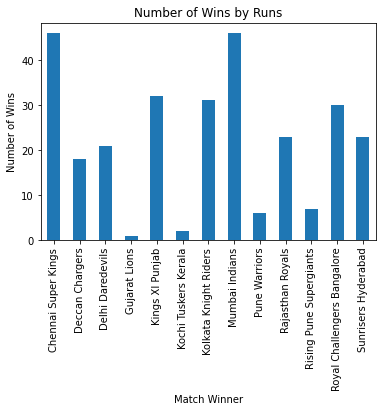

In [105]:
# Group DataFrame by 'match_winner' & count the number of occurrences of 'Win_Type' where 'Win_Type' is 'runs'
win_count = match_datadf[match_datadf['Win_Type'] == 'runs'].groupby('match_winner')['Win_Type'].count()

# Plot the results as a bar chart
win_count.plot(kind='bar')

# Set the chart title and axis labels
plt.title('Number of Wins by Runs')
plt.xlabel('Match Winner')
plt.ylabel('Number of Wins')

# Display the chart
plt.show()

# Counting the number of wins by runs for each match winner and visualizes the results as a bar chart.

In [164]:
match_winnerdf2 = match_datadf[match_datadf['Win_Type'] == 'wickets'].groupby('match_winner')['Win_Type'].count()
match_winnerdf2

# Here we count the number of wins by wickets for each match winner.

match_winner
Chennai Super Kings            33
Deccan Chargers                11
Delhi Daredevils               41
Gujarat Lions                  12
Kings XI Punjab                36
Kochi Tuskers Kerala            4
Kolkata Knight Riders          46
Mumbai Indians                 44
Pune Warriors                   6
Rajasthan Royals               38
Rising Pune Supergiants         8
Royal Challengers Bangalore    42
Sunrisers Hyderabad            18
Name: Win_Type, dtype: int64

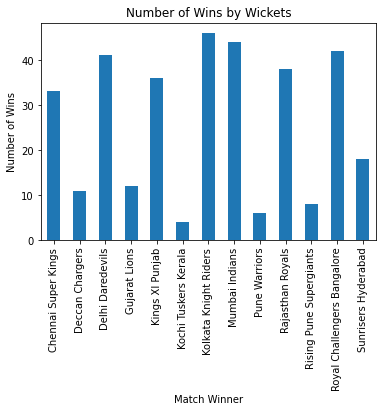

In [162]:
# Group DataFrame by 'match_winner' & count the number of occurrences of 'Win_Type' where 'Win_Type' is 'wickets'
win_count = match_datadf[match_datadf['Win_Type'] == 'wickets'].groupby('match_winner')['Win_Type'].count()

# Plot the results as a bar chart
win_count.plot(kind='bar')

# Set the chart title and axis labels
plt.title('Number of Wins by Wickets')
plt.xlabel('Match Winner')
plt.ylabel('Number of Wins')

# Display the chart
plt.show()

# Here we counts the number of wins by wickets for each match winner and visualizes the results as a bar chart.

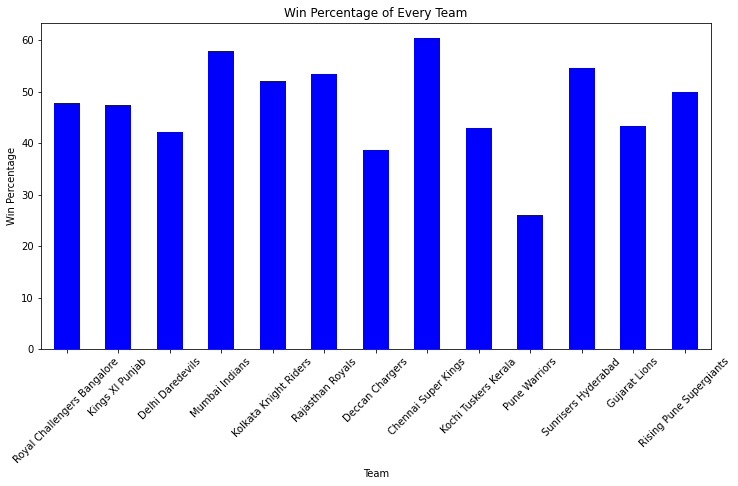

In [163]:
# Get a list of unique team names
team_names = match_datadf['Team1'].append(match_datadf['Team2']).unique()

# Initialize an empty dictionary to store win percentages
win_percentages = {}

# Calculate win percentage for each team
for team_name in team_names:
    team_matches = match_datadf[(match_datadf['Team1'] == team_name) | (match_datadf['Team2'] == team_name)]
    total_matches = len(team_matches)
    team_wins = len(team_matches[team_matches['match_winner'] == team_name])
    win_percentage = (team_wins / total_matches) * 100
    win_percentages[team_name] = win_percentage

# Convert the win_percentages dictionary to a Pandas Series
win_percentages_series = pd.Series(win_percentages)

# Plot the bar graph
plt.figure(figsize=(12, 6))
win_percentages_series.plot(kind='bar', color='blue')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Every Team')
plt.xticks(rotation=45)
plt.show()

# This code calculates and visualizes the win percentage of every team.

In [161]:
def plot_team_win_percentage(team_name):
    team_matches = match_datadf[(match_datadf['Team1'] == team_name) | (match_datadf['Team2'] == team_name)]
    total_matches_by_season = team_matches.groupby('Season_Year')['match_id'].count()
    team_wins_by_season = team_matches[team_matches['match_winner'] == team_name].groupby('Season_Year')['match_winner'].count()
    win_percentage_by_season = (team_wins_by_season / total_matches_by_season) * 100

    plt.figure(figsize=(10, 6))
    win_percentage_by_season.plot(kind='line', marker='o', color='blue')
    plt.xlabel('Season Year')
    plt.ylabel('Win Percentage')
    plt.title(f'{team_name} Win Percentage by Season')
    plt.show()

# Get a list of unique team names
team_names = match_datadf['Team1'].append(match_datadf['Team2']).unique()

# Create the dropdown widget
team_dropdown = widgets.Dropdown(options=team_names, description='Select Team:')

# Display the interactive widget
widgets.interact(plot_team_win_percentage, team_name=team_dropdown)

# The code defines a function to plot a selected team's win percentage by season 
# and creates an interactive widget using the dropdown menu for the user to select the team to visualize.

interactive(children=(Dropdown(description='Select Team:', options=('Royal Challengers Bangalore', 'Kings XI P…

<function __main__.plot_team_win_percentage(team_name)>

## Toss analysis

In [54]:
# create label encoder object
le = LabelEncoder()

# encode the two columns
match_df["Toss_Winner"] = le.fit_transform(match_df["Toss_Winner"])
match_df["match_winner"] = le.fit_transform(match_df["match_winner"])

# find the correlation between the two columns
correlation = match_df["Toss_Winner"].corr(match_df["match_winner"])

print(f"The correlation between winning a toss and winning a match is: {correlation}")

The correlation between winning a toss and winning a match is: 0.4618859210426269


In [94]:
# Count the number of matches where the toss winner also won the match
toss_and_match_winner = match_df[match_df['Toss_Winner'] == match_df['match_winner']].shape[0]

# Total number of matches
total_matches = match_df.shape[0]

# Calculate the percentage of matches where the toss winner also won the match
toss_winning_impact = (toss_and_match_winner / total_matches) * 100

print(f"The toss winner also won the match in {toss_winning_impact:.2f}% of the matches.")

The toss winner also won the match in 42.54% of the matches.


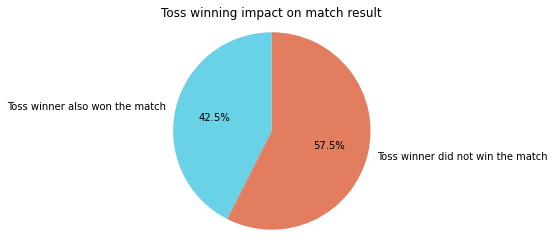

In [95]:
# Calculate the percentage of matches where the toss winner also won the match
toss_and_match_winner = match_df[match_df['Toss_Winner'] == match_df['match_winner']].shape[0]
total_matches = match_df.shape[0]
toss_winning_impact = (toss_and_match_winner / total_matches) * 100

# Create the pie chart
labels = ['Toss winner also won the match', 'Toss winner did not win the match']
sizes = [toss_winning_impact, 100 - toss_winning_impact]
colors = ['#69D2E7', '#E27D60']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Toss winning impact on match result')
plt.show()

# The code calculates the percentage of matches where the toss winner also won the match 
# and creates a pie chart to visualize the toss winning impact on match result.

## Venue analysis

In [55]:
match_datadf['Venue_Name'].nunique()
# Counting the number of venue where IPL matches has been played over the period of time.

37

In [56]:
grouped_data = match_datadf.groupby('Venue_Name')['match_winner'].count()
grouped_data.head()
# Displaying how many matches won on each stadiums

Venue_Name
Barabati Stadium               7
Brabourne Stadium             11
Buffalo Park                   3
De Beers Diamond Oval          3
Dr DY Patil Sports Academy    17
Name: match_winner, dtype: int64

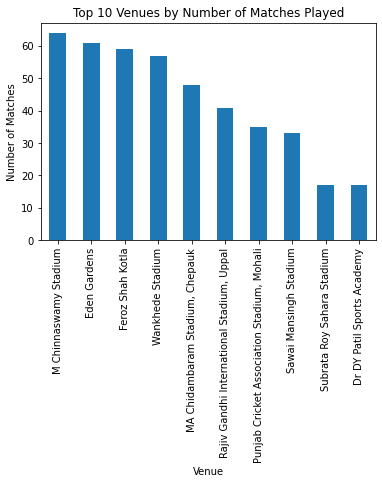

In [134]:
# Group the data by venue and count the number of matches won
venue_counts = match_datadf.groupby('Venue_Name')['match_winner'].count()

# Sort the counts in descending order and select the top 10
top_venues = venue_counts.sort_values(ascending=False).nlargest(10)

# Plot the results as a histogram
top_venues.plot(kind='bar')
plt.title('Top 10 Venues by Number of Matches Played')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.show()

# The code groups match data by venue, counts the number of matches won, selects the top 10 venues, 
# and plots the results as a histogram.

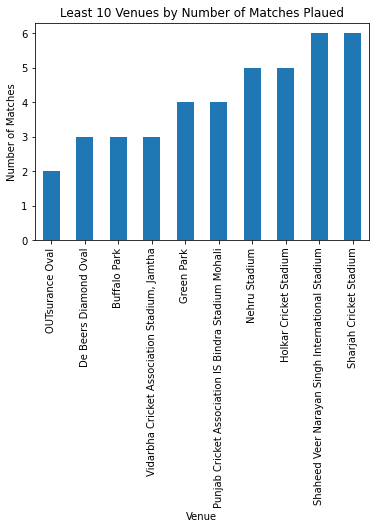

In [135]:
# Group the data by venue and count the number of matches won
venue_counts = match_datadf.groupby('Venue_Name')['match_winner'].count()

# Sort the counts in ascending order and select the least 10
top_venues = venue_counts.sort_values(ascending=False).nsmallest(10)

# Plot the results as a histogram
top_venues.plot(kind='bar')
plt.title('Least 10 Venues by Number of Matches Plaued')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.show()

# The code groups match data by venue, sorts the number of matches played in ascending order, 
# and then selects the least 10 venues, and displays them in a histogram.

In [58]:
new_df1 = match_datadf[match_datadf['Toss_Name'] == 'field'].groupby('Venue_Name')['match_winner'].count()
new_df1
# Counting and displaying how many teams has won on venues when decided to field first in the match. 

Venue_Name
Barabati Stadium                                         5
Brabourne Stadium                                        5
De Beers Diamond Oval                                    1
Dr DY Patil Sports Academy                              10
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium      6
Dubai International Cricket Stadium                      4
Eden Gardens                                            33
Feroz Shah Kotla                                        34
Green Park                                               4
Himachal Pradesh Cricket Association Stadium             8
Holkar Cricket Stadium                                   4
JSCA International Stadium Complex                       4
Kingsmead                                                5
M Chinnaswamy Stadium                                   55
MA Chidambaram Stadium, Chepauk                         14
Maharashtra Cricket Association Stadium                 13
Nehru Stadium                                

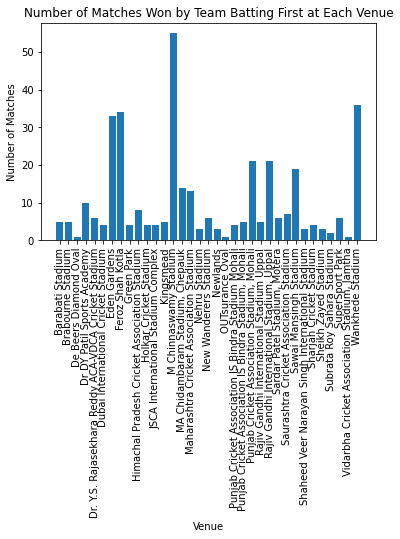

In [59]:
# Get the count of match winners grouped by venue
venue_counts1 = match_datadf[match_datadf['Toss_Name'] == 'field'].groupby('Venue_Name')['match_winner'].count()

# Create a bar chart
plt.bar(venue_counts1.index, venue_counts1.values)

# Set chart title and axis labels
plt.title("Number of Matches Won by Team Batting First at Each Venue")
plt.xlabel("Venue")
plt.ylabel("Number of Matches")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

# This creates bar chart displaying no of matches won by team batting first at each venue 
# where toss winner chose to field first.

In [60]:
new_df2 = match_datadf[match_datadf['Toss_Name'] == 'bat'].groupby('Venue_Name')['match_winner'].count()
new_df2
# Counting and displaying how many teams has won on venues when decided to bat first in the match.

Venue_Name
Barabati Stadium                                         2
Brabourne Stadium                                        6
Buffalo Park                                             3
De Beers Diamond Oval                                    2
Dr DY Patil Sports Academy                               7
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium      5
Dubai International Cricket Stadium                      3
Eden Gardens                                            28
Feroz Shah Kotla                                        25
Himachal Pradesh Cricket Association Stadium             1
Holkar Cricket Stadium                                   1
JSCA International Stadium Complex                       3
Kingsmead                                               10
M Chinnaswamy Stadium                                    9
MA Chidambaram Stadium, Chepauk                         34
Maharashtra Cricket Association Stadium                  2
Nehru Stadium                                

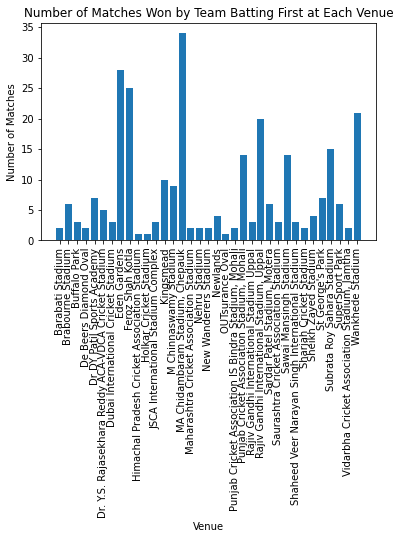

In [61]:
# Get the count of match winners grouped by venue
venue_counts2 = match_datadf[match_datadf['Toss_Name'] == 'bat'].groupby('Venue_Name')['match_winner'].count()

# Create a bar chart
plt.bar(venue_counts2.index, venue_counts2.values)

# Set chart title and axis labels
plt.title("Number of Matches Won by Team Batting First at Each Venue")
plt.xlabel("Venue")
plt.ylabel("Number of Matches")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

# This code creates a bar chart showing the number of matches won by teams batting first at each venue.

In [159]:
# Extract and subsetting the necessary columns
venue_data = clean_df[['match_id', 'Season_Year', 'match_winner', 'Venue_Name']]

In [99]:
venue_group= venue_data.groupby(['Venue_Name'])['match_winner'].count().sort_values(ascending=False)
# Here we group the data by the venue name, and counts the number of match winners for each venue, 
# then sorts the values in descending order.

In [137]:
def plot_grouped_by_team(team):
    top_venue_group = venue_data[venue_data['match_winner']==team].groupby(['Venue_Name'])['match_winner'].count().div(22).sort_values(ascending=False).head(10)
    plt.bar(top_venue_group.index, top_venue_group.values)
    plt.xticks(rotation=90)
    plt.xlabel('Venue Name')
    plt.ylabel('Number of Match Winners')
    plt.title(f'Top 10 Venues with Most Matches Won for {team}')
    plt.show()

team_list = venue_data['match_winner'].unique().tolist()
team_dropdown = widgets.Dropdown(options=team_list, description='Select a team:')
output = widgets.Output()

def dropdown_eventhandler(change):
    output.clear_output()
    with output:
        plot_grouped_by_team(change.new)

team_dropdown.observe(dropdown_eventhandler, names='value')
display(team_dropdown)
display(output)

# This code creates an interactive widget with a dropdown menu that allows the user to select a cricket team, 
# and displays a bar chart of the top 10 venues where the selected team has won the most matches.

Dropdown(description='Select a team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredev…

Output()

## Player Performance analysis

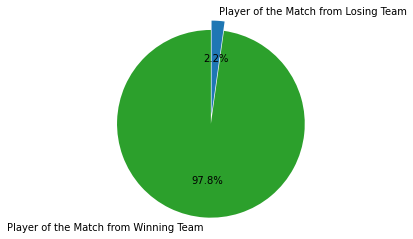

In [138]:
# Count the number of occurrences where 'is_manofThematch' is True and 'IsPlayers_Team_won' is True
motm_winning_count = player_match_df.loc[(player_match_df['is_manofThematch'] == True) & (player_match_df['IsPlayers_Team_won'] == True)].shape[0]

# Calculate the total number of times a player of the match was selected
motm_total_count = player_match_df.loc[(player_match_df['is_manofThematch'] == True)].shape[0]

# Calculate the percentage of times the player of the match was from the winning team
motm_winning_percentage = round((motm_winning_count / motm_total_count) * 100, 2)

# Create a pie chart
labels = ['Player of the Match from Winning Team', 'Player of the Match from Losing Team']
sizes = [motm_winning_percentage, 100 - motm_winning_percentage]
colors = ['tab:green', 'tab:blue']
explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.show()

# Displaying a pie chart to show what percentage of player who is awarded the man of the match and 
# this player is from the winning team of the match.

In [108]:
match_df['ManOfMach'].value_counts()
# Counting how many times a player has been awarded man of the match award.

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
RG Sharma         14
                  ..
MD Mishra          1
SB Wagh            1
S Anirudha         1
M Kartik           1
KV Sharma          1
Name: ManOfMach, Length: 202, dtype: int64

In [139]:
# Get the count of each value in the 'ManOfMach' column
man_of_match_count = match_df['ManOfMach'].value_counts()

# Get the top 10 values
top_10 = man_of_match_count.head(10)

# Print the top 10 values
print(top_10)

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
RG Sharma         14
SK Raina          14
MS Dhoni          13
G Gambhir         13
MEK Hussey        12
AM Rahane         12
Name: ManOfMach, dtype: int64


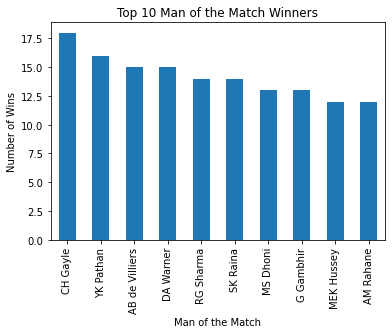

In [140]:
# Get the count of each value in the 'ManOfMach' column
man_of_match_count = match_df['ManOfMach'].value_counts()

# Get the top 10 values
top_10 = man_of_match_count.head(10)

# Plot the top 10 values as a bar chart
top_10.plot(kind='bar')

# Set the chart title and axis labels
plt.title('Top 10 Man of the Match Winners')
plt.xlabel('Man of the Match')
plt.ylabel('Number of Wins')

# Display the chart
plt.show()

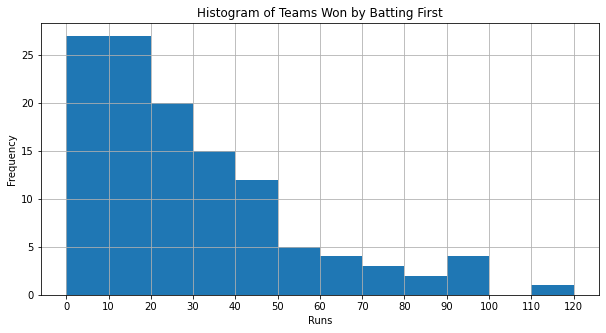

In [114]:
runs_won_batting_first = match_df[(match_df['Toss_Name'] == 'bat') & (match_df['Win_Type'] == 'runs')]['Win_Margin']

plt.figure(figsize=(10, 5))
plt.hist(runs_won_batting_first, bins=range(0, int(runs_won_batting_first.max()) + 10, 10))
plt.title('Histogram of Teams Won by Batting First')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.xticks(range(0, int(runs_won_batting_first.max()) + 10, 10))
plt.grid(True)
plt.show()

# This displays a histogram of win margin for teams that won by batting first in cricket matches.

In [141]:
# Group the DataFrame by captain
captain_grouped = player_match_df.groupby('Player_Captain')

# Calculate the number of matches, wins, and losses for each captain
captain_matches = captain_grouped['match_id'].nunique()
captain_wins = captain_grouped['IsPlayers_Team_won'].sum()
captain_losses = captain_matches - captain_wins

# Calculate the win percentage for each captain
captain_win_percentages = captain_wins / captain_matches * 100

# Find the captain with the highest win percentage
best_captain = captain_win_percentages.idxmax()

# Print the results
print(f'The best captain in the dataset is {best_captain} with a win percentage of {captain_win_percentages.loc[best_captain]:.2f}%.')

The best captain in the dataset is LRPL Taylor with a win percentage of 1100.00%.


In [142]:
# Filter the DataFrame to only include matches where the player was a captain and their team won
captain_wins_df = player_match_df.loc[(player_match_df['Role_Desc'] == 'Captain') & (player_match_df['IsPlayers_Team_won'])]

# Group the filtered DataFrame by captain
captain_wins_grouped = captain_wins_df.groupby('Player_Captain')

# Count the number of matches won by each captain
captain_win_counts = captain_wins_grouped['match_id'].nunique()

# Sort the captains by the number of matches won in descending order
captain_win_counts_sorted = captain_win_counts.sort_values(ascending=False)

# Print the top 5 captains with the most wins
print('Top 5 captains with the most wins:')
print(captain_win_counts_sorted.head(5))

Top 5 captains with the most wins:
Player_Captain
G Gambhir       70
RG Sharma       45
V Kohli         39
SK Warne        31
SR Tendulkar    30
Name: match_id, dtype: int64


In [143]:
# Filter the DataFrame to only include matches where the player was a captain
captain_df = player_match_df.loc[player_match_df['Role_Desc'] == 'Captain']

# Group the filtered DataFrame by captain
captain_grouped = captain_df.groupby('Player_Captain')

# Count the number of matches won and lost by each captain
captain_wins = captain_grouped['IsPlayers_Team_won'].sum()
captain_losses = captain_grouped['match_id'].nunique() - captain_wins

# Calculate the win percentage for each captain
captain_win_percentages = captain_wins / (captain_wins + captain_losses) * 100

# Sort the captains by their win percentage in descending order
captain_win_percentages_sorted = captain_win_percentages.sort_values(ascending=False)

# Print the results
print('Win percentages of every captain:')
print(captain_win_percentages_sorted)

Win percentages of every captain:
Player_Captain
LRPL Taylor         100.000000
SM Pollock           75.000000
KK Nair              66.666667
SPD Smith            66.666667
RG Sharma            60.000000
SR Tendulkar         58.823529
CL White             58.333333
A Kumble             57.692308
G Gambhir            56.910569
SK Warne             56.363636
DA Warner            55.319149
V Sehwag             54.716981
DL Vettori           54.545455
DJ Hussey            50.000000
DJG Sammy            50.000000
GJ Maxwell           50.000000
Harbhajan Singh      50.000000
RT Ponting           50.000000
Yuvraj Singh         48.837209
V Kohli              48.148148
GJ Bailey            46.666667
R Dravid             45.833333
SK Raina             43.750000
Z Khan               43.478261
SC Ganguly           40.476190
S Dhawan             40.000000
KC Sangakkara        40.000000
M Vijay              37.500000
SR Watson            37.500000
JP Duminy            37.500000
MS Dhoni             

In [144]:
# Filter the DataFrame to only include matches where the player was a captain
captain_df = player_match_df.loc[player_match_df['Role_Desc'] == 'Captain']

# Group the filtered DataFrame by captain
captain_grouped = captain_df.groupby('Player_Captain')

# Count the number of matches won and lost by each captain
captain_wins = captain_grouped['IsPlayers_Team_won'].sum()
captain_losses = captain_grouped['match_id'].nunique() - captain_wins

# Calculate the win percentage for each captain
captain_win_percentages = captain_wins / (captain_wins + captain_losses) * 100

# Filter the results to only include captains with more than 5 matches
captain_win_percentages_filtered = captain_win_percentages[captain_wins + captain_losses > 5]

# Sort the captains by their win percentage in descending order
captain_win_percentages_sorted = captain_win_percentages_filtered.sort_values(ascending=False)

# Print the results
print('Win percentages of every captain with more than 5 matches:')
print(captain_win_percentages_sorted)

Win percentages of every captain with more than 5 matches:
Player_Captain
SPD Smith           66.666667
RG Sharma           60.000000
SR Tendulkar        58.823529
CL White            58.333333
A Kumble            57.692308
G Gambhir           56.910569
SK Warne            56.363636
DA Warner           55.319149
V Sehwag            54.716981
DL Vettori          54.545455
DJ Hussey           50.000000
GJ Maxwell          50.000000
Harbhajan Singh     50.000000
RT Ponting          50.000000
Yuvraj Singh        48.837209
V Kohli             48.148148
GJ Bailey           46.666667
R Dravid            45.833333
SK Raina            43.750000
Z Khan              43.478261
SC Ganguly          40.476190
S Dhawan            40.000000
KC Sangakkara       40.000000
JP Duminy           37.500000
SR Watson           37.500000
M Vijay             37.500000
MS Dhoni            33.333333
DPMD Jayawardene    33.333333
AJ Finch            20.000000
BB McCullum         20.000000
KP Pietersen        17.647

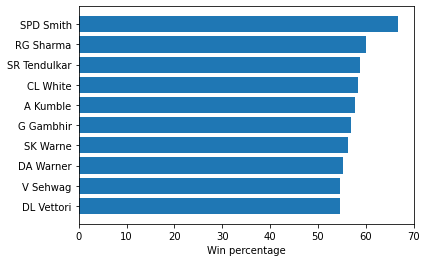

In [154]:
# Filter the DataFrame to only include matches where the player was a captain
captain_df = player_match_df.loc[player_match_df['Role_Desc'] == 'Captain']

# Group the filtered DataFrame by captain
captain_grouped = captain_df.groupby('Player_Captain')

# Count the number of matches won and lost by each captain
captain_wins = captain_grouped['IsPlayers_Team_won'].sum()
captain_losses = captain_grouped['match_id'].nunique() - captain_wins

# Calculate the win percentage for each captain
captain_win_percentages = captain_wins / (captain_wins + captain_losses) * 100

# Filter the results to only include captains with more than 5 matches
captain_win_percentages_filtered = captain_win_percentages[captain_wins + captain_losses > 5]

# Sort the captains by their win percentage in descending order
captain_win_percentages_sorted = captain_win_percentages_filtered.sort_values(ascending=True).tail(10)

# Create a horizontal bar chart
plt.barh(captain_win_percentages_sorted.index, captain_win_percentages_sorted)

# Set the x-axis label
plt.xlabel('Win percentage')

# Show the plot
plt.show()

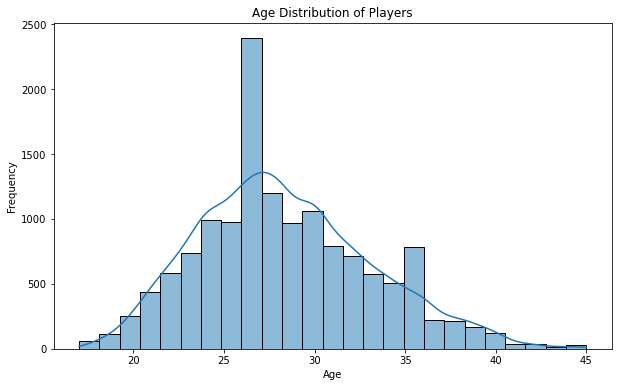

In [146]:
plt.figure(figsize=(10, 6))
sns.histplot(data=player_match_df, x='Age_As_on_match', bins=25, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Players')
plt.show()

# This generates a histogram, which shows distribution of player ages by using the Seaborn library.

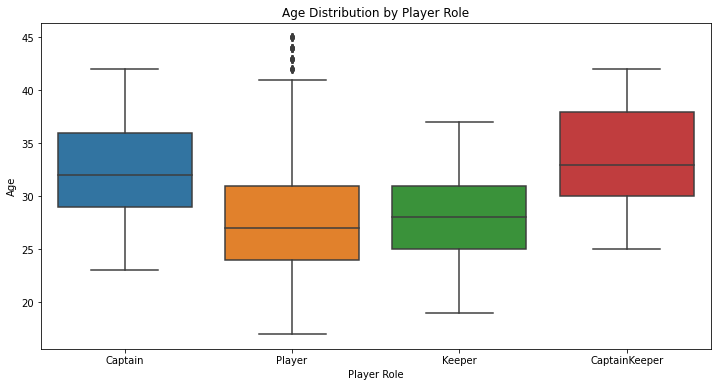

In [147]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=player_match_df, x='Role_Desc', y='Age_As_on_match')
plt.xlabel('Player Role')
plt.ylabel('Age')
plt.title('Age Distribution by Player Role')
plt.show()

# Plotting the age distribution of each player as per their role.

In [148]:
most_mom = player_match_df.groupby(['Season_year', 'Player_Name'])['is_manofThematch'].sum().reset_index()
most_mom = most_mom.loc[most_mom.groupby('Season_year')['is_manofThematch'].idxmax()]
most_mom

# Subsetting and displaying players with most man of the match awards per season.

,Season_year,Player_Name,is_manofThematch
123,2008,SE Marsh,5
323,2009,YK Pathan,3
485,2010,SR Tendulkar,4
546,2011,CH Gayle,6
749,2012,CH Gayle,5
1004,2013,MEK Hussey,5
1132,2014,GJ Maxwell,4
1274,2015,DA Warner,4
1544,2016,V Kohli,5
1574,2017,BA Stokes,3


## Win Margin analysis

In [70]:
mean_margin = match_df['Win_Margin'].mean()
mean_margin

17.272292993630572

In [71]:
median_margin = match_df['Win_Margin'].median()
median_margin

8.0

In [72]:
std_margin = match_df['Win_Margin'].std()
std_margin

# standard deviation of 'Win_Margin' here tells us 
# how much the win margins vary from the average win margin across all the matches in the dataset.

22.212631932783705

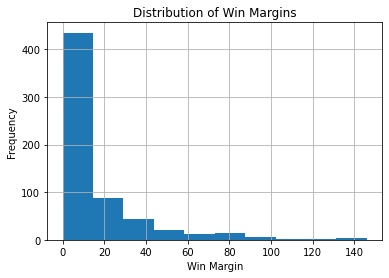

In [157]:
# Plot a histogram of win margin values
match_df['Win_Margin'].hist()

# Set the chart title and axis labels
plt.title('Distribution of Win Margins')
plt.xlabel('Win Margin')
plt.ylabel('Frequency')

# Display the chart
plt.show()

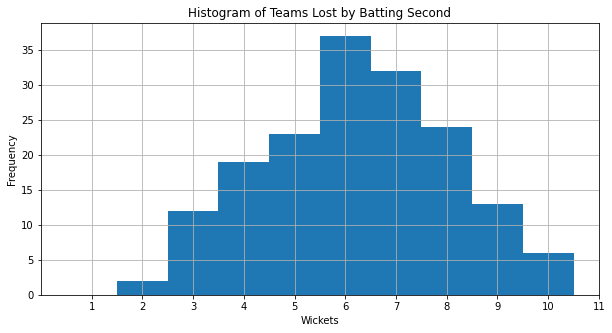

In [156]:
wickets_lost_batting_second = match_df[(match_df['Toss_Name'] == 'field') & (match_df['Win_Type'] == 'wickets')]['Win_Margin']

plt.figure(figsize=(10, 5))
plt.hist(wickets_lost_batting_second, bins=range(1, int(wickets_lost_batting_second.max()) + 2), align='left')
plt.title('Histogram of Teams Lost by Batting Second')
plt.xlabel('Wickets')
plt.ylabel('Frequency')
plt.xticks(range(1, int(wickets_lost_batting_second.max()) + 2))
plt.grid(True)
plt.show()

# Plotting a histogram where teams lost by batting second.